In [1]:
pip install praw


  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for update-checker>=0.18 from https://files.pythonhosted.org/packages/0c/ba/8dd7fa5f0b1c6a8ac62f8f57f7e794160c1f86f31c6d0fb00f582372a3e4/update_checker-0.18.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------------ --------------------------- 61.4/191.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 184.3/191.0 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.9 MB/s eta 0:00:00


# Authentication

In [2]:
# PRAW Reddit instance with provided client credentials and a custom user agent for accessing Reddit's API.
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="4VjNBS1CFaF9YFdTIbJCqw",
    client_secret="OOri7aBZsFMn1q0UiMitHnTPz_AlRA",
    user_agent=user_agent
)

In [3]:
#importing li
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
102
0.96
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


In [5]:
# The code retrieves unique titles of all hot submissions from the "bitcoin" subreddit using the PRAW Reddit instance and prints the total number of unique headlines.
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

612


In [6]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Buying Bitcoin In 2024 Will Change Your Life!
1,I am searching for answers on a physical Bitco...
2,Halving bug??? Help me understand
3,Humanity has become absurdly productive and ef...
4,Is it advisable to use bitcoin for transaction...


In [7]:
# creates a new DataFrame "df" containing all rows and columns except the first column from the DataFrame "bitcoin_df".
df = bitcoin_df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Buying Bitcoin In 2024 Will Change Your Life!
1,I am searching for answers on a physical Bitco...
2,Halving bug??? Help me understand
3,Humanity has become absurdly productive and ef...
4,Is it advisable to use bitcoin for transaction...


In [8]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [9]:
bitcoin_df.columns = ['Titles']

In [10]:
bitcoin_df.head()

,Titles
0,Buying Bitcoin In 2024 Will Change Your Life!
1,I am searching for answers on a physical Bitco...
2,Halving bug??? Help me understand
3,Humanity has become absurdly productive and ef...
4,Is it advisable to use bitcoin for transaction...


In [11]:
# calculating for the duplicate titles in the dataframe
bitcoin_df.Titles.duplicated().sum()

0

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Buying Bitcoin In 2024 Will Change Your Life!
1,I am searching for answers on a physical Bitco...
2,Halving bug??? Help me understand
3,Humanity has become absurdly productive and ef...
4,Is it advisable to use bitcoin for transaction...


In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Buying Bitcoin In 2024 Will Change Your Life!
1,I am searching for answers on a physical Bitco...
2,Halving bug??? Help me understand
3,Humanity has become absurdly productive and ef...
4,Is it advisable to use bitcoin for transaction...


In [14]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/626.3 kB 919.0 kB/s eta 0:00:01
   ----------- ---------------------------- 174.1/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00


In [15]:
# Importing the `TextBlob` and wordcloud.
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Buying Bitcoin In 2024 Will Change Your Life!,0.000000,0.0
1,I am searching for answers on a physical Bitco...,0.142857,0.0
2,Halving bug??? Help me understand,0.000000,0.0
3,Humanity has become absurdly productive and ef...,0.447917,0.0
4,Is it advisable to use bitcoin for transaction...,0.500000,0.5


In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Buying Bitcoin In 2024 Will Change Your Life!,0.000000,0.000000,Neutral
1,I am searching for answers on a physical Bitco...,0.142857,0.000000,Neutral
2,Halving bug??? Help me understand,0.000000,0.000000,Neutral
3,Humanity has become absurdly productive and ef...,0.447917,0.000000,Neutral
4,Is it advisable to use bitcoin for transaction...,0.500000,0.500000,Positive
5,It's beautiful,1.000000,0.850000,Positive
6,"A Paradigm Shift in Money with American HODL, ...",0.000000,0.000000,Neutral
7,Gene Wilder halving before it was cool...circa...,0.000000,0.000000,Neutral
8,Happy New Year to the Bitcoin Community!,0.727273,0.485227,Positive
9,Many rabbit holes,0.500000,0.500000,Positive


# Data Visualization

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

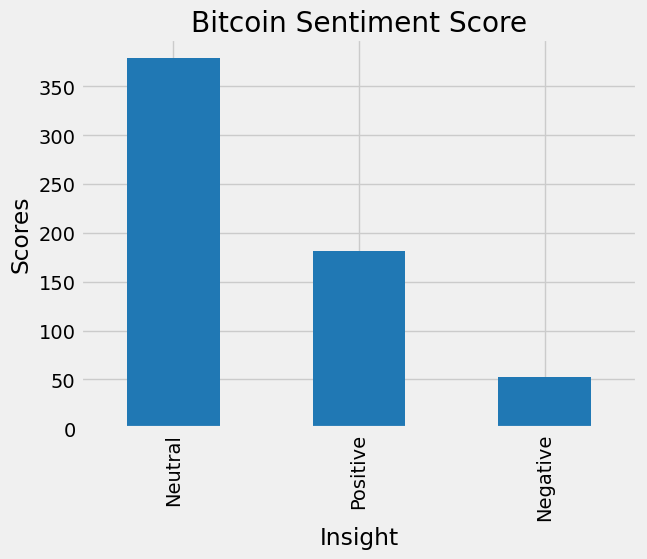

In [19]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

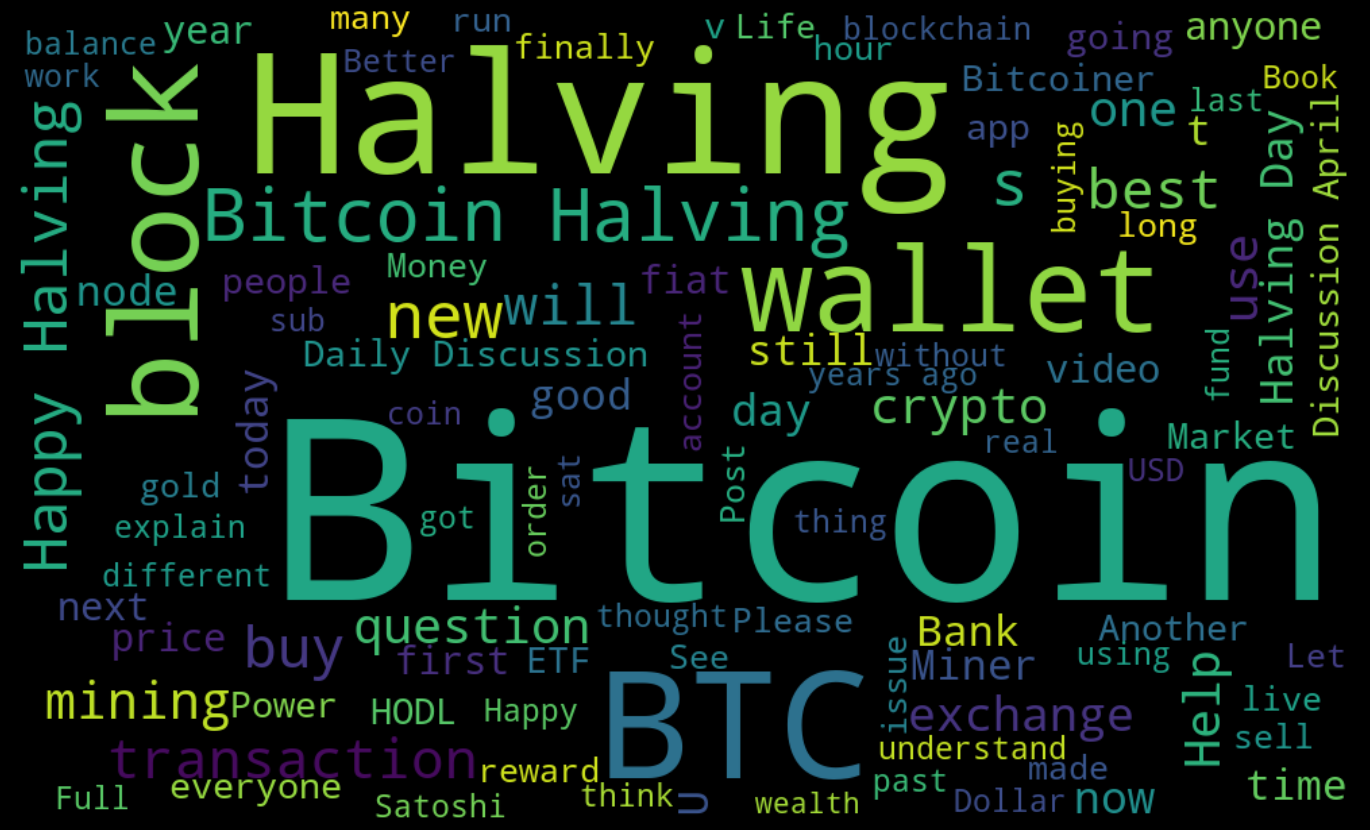

In [20]:
#Generating a word cloud visualization from the titles of Bitcoin-related articles.
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");